In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Mini-TP distance point-droite

On va implémenter les formules démontrées en TD, en python.
- 1. Initialiser une droite de paramètres aléatoires (définissez une fonction). 

- 2. Représentez cette droite dans le plan (définissez une fonction display).
(voir détails plus bas)

- 3. Calculez la distance (signée) entre un point quelconque et la droite (définissez une fonction distancePoint_Droite).

- 4. Affichez la distance (signée) à la droite avec un dégradé de couleurs.


## 0. On vous montre qq commandes

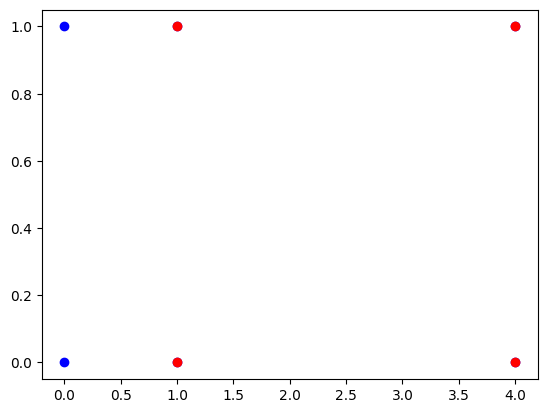

In [2]:
# voici les données brutes, sans le "rajout du 1"
X = np.array([[0,0],[0,1],[1,0],[1,1],[4,0],[4,1]])
T = np.array([-1,-1,1,1,1,1])
plt.scatter(X[:,0], X[:,1], color="blue")
plt.scatter(X[T==1,0], X[T==1,1], color="red")

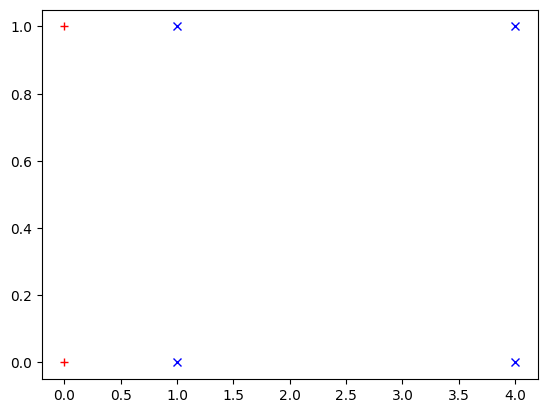

In [3]:
# voici les données après le "rajout du 1"
N=6
Xaug = np.hstack((np.ones((N,1)), X)) 
X = Xaug
W1 = X[T==-1,1:] # points of class "-1"
W2 = X[T== 1,1:] # points of class "+1"
plt.plot(W1[:,0], W1[:,1], 'r+') # points of class "-1"
plt.plot(W2[:,0], W2[:,1], 'bx') # points of class "+1"

## 1. Initialiser une droite de paramètres aléatoires (définissez une fonction).

In [ ]:
def initializeWeights():
    # D est la dimension choisie pour le vecteur de paramètres (nombre de paramètres)
    D = ??
    wparameters = ?? 
    return wparameters
np.random.seed(43)
w = initializeWeights()
w

## 2. Représentez cette droite dans le plan (définissez une fonction display).

- à partir de $\vec w \in \mathbb{R}^3$, définissez $w_0$ et $\vec w'\in \mathbb{R}^2$, comme dans le TD (exo *Distance point-droite (Démonstration)*)
- définissez le vecteur unitaire donnant la direction orthogonale à la droite, $$\vec u =\frac{ \vec w'}{ ||\vec w'||}$$
- définissez la distance entre l'origine du repère (point de coordonnées (0,0)) et la droite. Rappel: c'est $$-\frac{w_0}{||w'||}$$
- Déduisez-en (pas *directement* fait en TD!) la position du point qui est le projeté de l'origine sur la droite.  Ce point sera le milieu du segement de droite que vous tracerez
- Calculez le vecteur orthogonal au vecteur $\vec w$, qui sera donc colinéaire à la droite. Cela peut se faire par une rotation de 90 degrés ($\pi/2$).
- Ensuite, les 2 extremités du segment peuvent etre obtenues comme la somme et la différence des 2 vecteurs qu'on vient de calculer.

Attention au fait que la droite est caractérisée par 3 paramètres, mais que les vecteurs et points du plan sont repérés par seulement 2 coordonnées.

### Alternative: revenir à la formulation "y=ax+b" et traiter les cas particuliers à part

In [ ]:
## Il peut etre utile de definir la norme d'un vecteur:
def norme(w):
    return ??

In [ ]:
def display(X, T, wInit, iteration):
    w  = wInit.copy()
    w0 = ??
    ## on normalise les composantes du vrai vecteur w 
    wprime = ??
    print(w, w0, wprime)
    
    u_w = ??  # vecteur unitaire donnant la direction
    distance_origine_droite = ?? 
    projete_de_Origine_sur_droite = ??
    vecteur_Orthogonal_A_La_Droite = ??
    
    ## on définit maintenant les coordonnées du segment de droite (ce sont 2 vecteurs)
    extremite1 = ??
    extremite2 = ??
    
    ## on extrait les abcisses et les ordonnées de ces 2 vecteurs:
    extremites_abscisses = np.array([extremite1[0], extremite2[0]])
    extremites_ordonnees = np.array([extremite1[1], extremite2[1]])
    
    plt.figure(1)
    ## on affiche les points de données:
    Class1 = X[T==-1,1:] # points of class "-1"
    Class2 = X[T== 1,1:] # points of class "+1"
    plt.plot(Class1[:,0], Class1[:,1], 'r+') # points of class "-1"
    plt.plot(Class2[:,0], Class2[:,1], 'bx') # points of class "+1"
    
    ## on affiche le segment de droite:
    plt.plot(extremites_abscisses, extremites_ordonnees,  color='blue')

    ## autre méthode
    if w[2] != 0.0:
        TOOD
    else:
        TODO
    

In [ ]:
display(X,T, w, 0)

## 3. Calculez la distance (signée) entre un point quelconque et la droite (définissez une fonction distancePoint_Droite).

Remarque: la formule est contenue dans la question 3 de l'exercice "3.2  Distance point-droite (Démonstration)"


In [ ]:
def distancePoint_Droite(x, w):
    return ??

In [ ]:
## test: il faudrait que votre fonction puisse
## calculer des séries de points X:
N = 10 # nombre de points
D = 3 # dimension de chaque point
x = np.random.random((N, D))
x, distancePoint_Droite(x, w)

## 4. Affichez la distance (signée) à la droite avec un dégradé de couleurs.

On vous aide pas mal. Vous pouvez aller voir la doc. de `pyplot.contourf`

In [ ]:
h = 0.002 ## grid mesh size
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
## xx et yy définissent une grille de valeurs de x et y qui 
## couvrent une portion du plan (un carré)
n = (xx.ravel()).shape[0]
Xs=np.c_[np.ones(n), xx.ravel(), yy.ravel()]
## Xs définit les coordonnées (x,y) des points dans ce carré
## notez qu'on a "ajouté les 1" aux points (X)

In [ ]:
xx.shape, xx, 

In [ ]:
xx.ravel().shape, xx.ravel()

In [ ]:
Z = ??
Z = Z.reshape(xx.shape)

plt.figure(figsize=[5,5]) ## equal x and y lengths for a squared figure
plt.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.4, levels=20)
plt.colorbar()
display(X,T, w,0)
